<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_CD_Coef_Correlacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Coeficientes de Correlação (Duas Variáveis Quantitativas)

## **Coeficiente de Pearson (r)**

* O coeficiente de correlação de Pearson mede a relação linear entre duas variáveis contínuas.
* Ele varia de -1 a 1, onde 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica ausência de correlação linear.
* É sensível a outliers e assume que as variáveis seguem uma distribuição normal e homocedasticidade
* É adequado para variáveis quantitativas com distribuição aproximadamente normal.

<br>


$$
r = \frac{{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}}{{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}}
$$

onde:
- $x_i$ e $y_i$: Valores individuais das variáveis $x$ e $y$.
- $ \bar{x} $ e $\bar{y}$: Médias das variáveis $x$ e $y$.
- $ n $: Número total de observações.

<br>



## **Coeficiente de Spearman (ρ)**:

* O coeficiente de correlação de Spearman mede a relação monótona entre duas variáveis, independentemente do tipo de relação (linear ou não).
* Ele é baseado nos postos (ordem) dos dados, em vez dos próprios valores.
Varia de -1 a 1, onde 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica ausência de correlação monotônica.
* É menos sensível a outliers do que o coeficiente de Pearson, e pode ser aplicado a qualquer tipo de distribuição.
* É adequado para variáveis quantitativas ou ordinais.

<br>

$$
r = \frac{{\sum_{i=1}^{n} (R_i - \bar{R})(S_i - \bar{S})}}{{\sqrt{\sum_{i=1}^{n} (R_i - \bar{R})^2 \sum_{i=1}^{n} (S_i - \bar{S})^2}}}
$$

ou

$$
\rho = 1 - \frac{{6 \sum_{i=1}^{n} d_i^2}}{{n(n^2 - 1)}}
$$

onde:
- $d_i $: Diferença entre os postos das observações de $ x $ e $ y $.
- $ n $: Número total de observações.

<br>





### Posto*

In [ ]:
import numpy as np
x = np.array([5, 3, 8, 2, 7])

rank_x = np.argsort(x) + 1

print("Postos x:", rank_x)


Postos x: [4 2 1 5 3]


In [ ]:
import numpy as np

x = np.array([5, 3, 8, 2, 7, 5])

rank_x = np.argsort(x) + 1

unique_x, unique_indices_x = np.unique(x, return_index=True)
rank_x_unique = np.argsort(unique_x) + 1
rank_x_dict = dict(zip(unique_x, rank_x_unique))
rank_x_final = np.array([rank_x_dict[value] for value in x])

print("Postos x:", rank_x_final)



Postos x: [3 2 5 1 4 3]


3. **Coeficiente de Kendall (τ)**:

* O coeficiente de correlação de Kendall mede a relação de concordância ou discordância entre duas variáveis ordinais.
* Ele é baseado na contagem de pares concordantes e discordantes.
* Varia de -1 a 1, onde 1 indica concordância perfeita, -1 indica discordância perfeita e 0 indica ausência de concordância ou discordância.
* É robusto a outliers e adequado para variáveis ordinais.

<br>

$
\tau = \frac{{\text{Número de pares concordantes} - \text{Número de pares discordantes}}}{{\frac{{n(n-1)}}{2}}}
$

onde:
- Número de pares concordantes: Pares de casos onde a ordem de $ x $ é a mesma que a ordem de $ y $.
- Número de pares discordantes: Pares de casos onde a ordem de $ x$ é diferente da ordem de $ y $.
- $ n $: Número total de casos.

### Pares Concordantes*

$$
x = [3, 6, 8, 4, 7] \\
y = [5, 9, 7, 6, 8]
$$

- O par $(3, 5)$, $ x_1 < x_2 $ e $ y_1 < y_2 $, então é um par concordante.
- O par $(6, 9)$, $ x_1 < x_2 $ e $ y_1 < y_2 $, então é um par concordante.
- O par $(8, 7)$, $ x_1 > x_2 $ e $ y_1 < y_2 $, então não é um par concordante.
- O par $(4, 6)$, $ x_1 < x_2 $ e $ y_1 < y_2 $, então é um par concordante.
- O par $(7, 8)$, $ x_1 < x_2 $ e $ y_1 < y_2 $, então é um par concordante.


In [ ]:
n_concordantes = 0

x = np.array([5, 3, 8, 2, 7])
y = np.array([10, 7, 5, 4, 8])
# y = np.array([10, 7, 5, 4, 8])

for i in range(len(x)):
    for j in range(i + 1, len(x)):
        if (x[i] - x[j]) * (y[i] - y[j]) > 0:
            n_concordantes += 1

print("Pares concordantes:", n_concordantes)


Pares concordantes: 6


# Cálculo dos Coeficientes em Python

Pearson (r): 0.9006752160894268
Spearman (ρ): 0.8760516051605161
Kendall (τ): 0.707878787878788


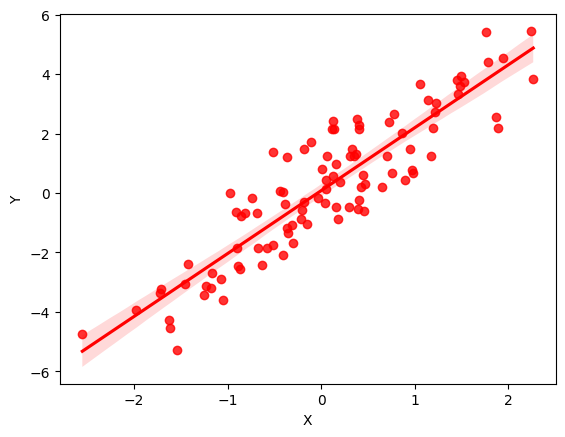

In [ ]:
from scipy.stats import pearsonr, spearmanr, kendalltau

np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 1, 100)  # linear

sns.regplot(x=x, y=y, color='r')
plt.xlabel('X')
plt.ylabel('Y')

r, _ = pearsonr(x, y)
rho, _ = spearmanr(x, y)
tau, _ = kendalltau(x, y)

print("Pearson (r):", r)
print("Spearman (ρ):", rho)
print("Kendall (τ):", tau)

plt.show()


## **Coeficiente Cohen's d**

 *d-Cohen*, ou medida de tamanho de efeito d, é uma estatística para quantificar a diferença entre as médias de dois grupos em termos de desvio padrão e empregado para avaliar a magnitude da diferença entre grupos. Os valores positivos indicam que o grupo 1 tem uma média maior do que o grupo 2, e valores negativos indicam que o grupo 1 tem uma média menor do que o grupo 2. Um valor de 0 indica que não há diferença entre as médias dos dois grupos. Seu cálculo é feido do seguinte modo:

$$d = \frac{\bar{x}_1 - \bar{x}_2}{s}$$

Onde $\bar{x}_1$ e $\bar{x}_2$ são as médias dos dois grupos e $s$ é o desvio padrão agrupado, calculado como:

$$s = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}$$

O valor do d-Cohen pode ser interpretado da seguinte forma:

- $\le$ 0,2: efeito pequeno
- $>$ 0,5: efeito médio
- $>$ 0,8: efeito grande  




In [ ]:
def cohen_d(x1, x2):
    mean_x1 = np.mean(x1)
    mean_x2 = np.mean(x2)

    std_x1 = np.std(x1, ddof=1)
    std_x2 = np.std(x2, ddof=1)

    n1 = len(x1)
    n2 = len(x2)

    pooled_std = np.sqrt(((n1 - 1) * std_x1 ** 2 + (n2 - 1) * std_x2 ** 2) / (n1 + n2 - 2))
    d = (mean_x1 - mean_x2) / pooled_std

    return d

x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([6, 7, 8, 9, 10, 11, 12])

d = cohen_d(x1, x2)
print("Coeficiente de Cohen's d:", d)

d = cohen_d(x2, x1)
print("Coeficiente de Cohen's d:", d)

d = cohen_d(x2, x2)
print("Coeficiente de Cohen's d:", d)

d = cohen_d(x2, 2*x2)
print("Coeficiente de Cohen's d:", d)

d = cohen_d(x2, 3*x2)
print("Coeficiente de Cohen's d:", d)

d = cohen_d(x2, 4*x2)
print("Coeficiente de Cohen's d:", d)


Coeficiente de Cohen's d: -3.077935056255462
Coeficiente de Cohen's d: 3.077935056255462
Coeficiente de Cohen's d: 0.0
Coeficiente de Cohen's d: -2.6349301969610393
Coeficiente de Cohen's d: -3.7263540204487127
Coeficiente de Cohen's d: -4.286974604602201


# Homocedasticidade

A suposição de homocedasticidade (= "mesma variância") é central para modelos de regressão linear. Ela descreve uma situação em que o termo de erro (ou seja, o "ruído" ou perturbação aleatória na relação entre as variáveis ​​independentes e a variável dependente) é o mesmo em todos os valores das variáveis ​​independentes. A heterocedasticidade (a violação da homocedasticidade) está presente quando o tamanho do termo de erro difere entre os valores de uma variável independente. O impacto da violação do pressuposto da homocedasticidade é uma questão de grau, aumentando à medida que a heterocedasticidade aumenta.

Imagine dados sobre a renda familiar e os gastos com itens de luxo. Utilizando a regressão bivariada, utilizamos a renda familiar para prever os gastos de luxo. Como esperado, existe uma associação forte e positiva entre receitas e despesas. Ao examinar os resíduos detectamos um problema – os resíduos são muito pequenos para valores baixos de renda familiar (quase todas as famílias com baixos rendimentos não gastam muito em itens de luxo) enquanto há grande variação no tamanho dos resíduos para famílias mais ricas (algumas famílias gastam muito em artigos de luxo, enquanto outras são mais moderadas nos seus gastos de luxo). Esta situação representa heterocedasticidade porque o tamanho do erro varia entre os valores da variável independente. O exame de um gráfico de dispersão dos resíduos em relação aos valores previstos da variável dependente mostraria um padrão clássico de heterocedasticidade em forma de cone.

O problema que a heterocedasticidade apresenta para modelos de regressão é que a regressão de mínimos quadrados ordinários (OLS) procura minimizar os resíduos e dá peso igual a todas as observações. Quando a heterocedasticidade está presente, os casos com perturbações maiores têm mais "atração" do que outras observações. Neste caso, a regressão de mínimos quadrados ponderados ou log seria mais apropriada, pois reduz o peso das observações com perturbações maiores.

